# Import Libraries, Datas and Set up Display

In [1]:
import pandas as pd
pd.options.display.max_rows = 100

In [2]:
products = pd.read_csv('/Users/alex/Desktop/Eniac/Project_Folder/DataFrames/Cleaned/cl_products.csv')
orderlines = pd.read_csv('/Users/alex/Desktop/Eniac/Project_Folder/DataFrames/Cleaned/cl_orderlines.csv')
orders = pd.read_csv('/Users/alex/Desktop/Eniac/Project_Folder/DataFrames/Cleaned/cl_orders.csv')
brands = pd.read_csv('/Users/alex/Desktop/Eniac/Project_Folder/DataFrames/Cleaned/cl_brands.csv')

# Check Distributions, Outliers

## *Orderlines*

In [3]:
orderlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216250 entries, 0 to 216249
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                216250 non-null  int64  
 1   id_order          216250 non-null  int64  
 2   product_id        216250 non-null  int64  
 3   product_quantity  216250 non-null  int64  
 4   sku               216250 non-null  object 
 5   unit_price        216250 non-null  float64
 6   date              216250 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 11.5+ MB


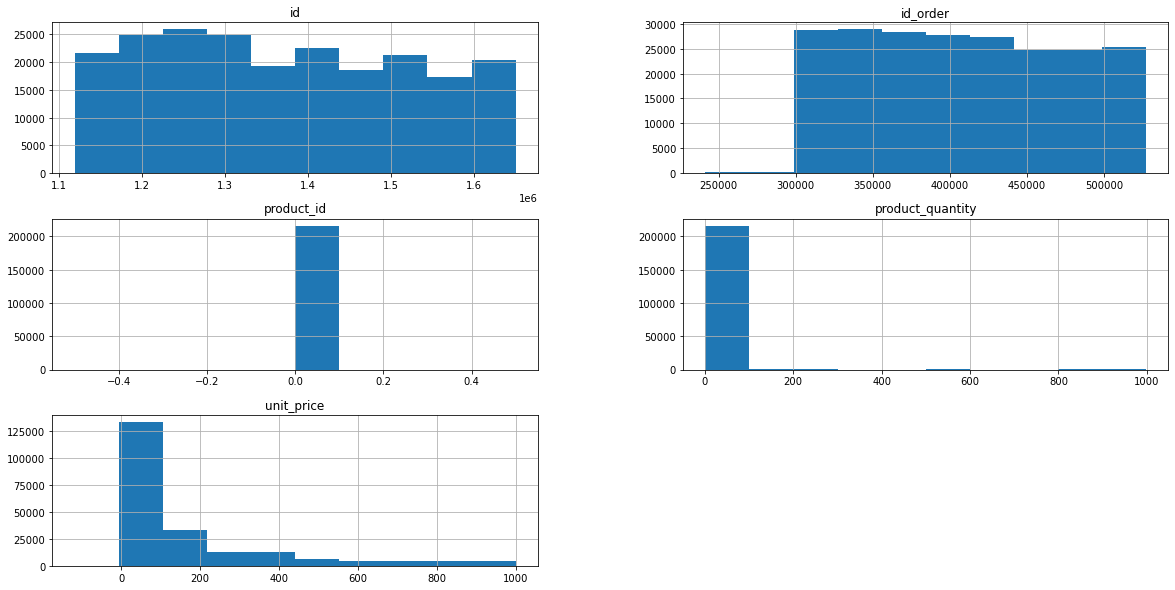

In [4]:
orderlines.hist(figsize=(20,10));

***Product Quantity and Unit_Price has outliers***
lower than the 25% quartile - (1.5 x interquartile range), or
higher than the 75% quartile + (1.5 x interquartile range)
is an outlier. Let's use this rule to try and exclude any corrupted data.

In [5]:
#Discover where there is problems:
orderlines.product_quantity.describe()

count    216250.000000
mean          1.136698
std           3.292203
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         999.000000
Name: product_quantity, dtype: float64

In [6]:
# calculate the quartiles
Q1_Quantity = orderlines["product_quantity"].quantile(0.25)
Q3_Quantity = orderlines["product_quantity"].quantile(0.75)

# calculate the interquartile range
IQR_Quantity = Q3_Quantity-Q1_Quantity

# filter the DataFrame to include only "non-outliers"
Quantity_no_outliers_df = orderlines.loc\
[(orderlines["product_quantity"] >= (Q1_Quantity - 1.5*IQR_Quantity)) & \
 (orderlines["product_quantity"] <= (Q3_Quantity + 1.5*IQR_Quantity)), :]



In [7]:
#Create list of Order ID that have no outliers
normal_Quantity_list = list(Quantity_no_outliers_df["id_order"])

In [8]:
#Keep rows with the list of Order ID
orders = orders.loc[orders["order_id"].isin(normal_Quantity_list), :]
orderlines = orderlines.loc[orderlines["id_order"].isin(normal_Quantity_list), :]

In [9]:
len(list(orders["order_id"].unique())), len(list(orderlines["id_order"].unique()))

(160713, 160850)

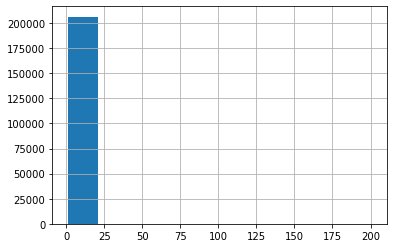

In [10]:
orderlines.product_quantity.hist();

In [11]:
orderlines.product_quantity.describe()

count    206373.000000
mean          1.034317
std           0.584848
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         201.000000
Name: product_quantity, dtype: float64

## *Products*

In [12]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10157 entries, 0 to 10156
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sku          10157 non-null  object 
 1   name         10157 non-null  object 
 2   desc         10151 non-null  object 
 3   price        10157 non-null  float64
 4   promo_price  5836 non-null   float64
 5   in_stock     10157 non-null  int64  
 6   type         10110 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 555.6+ KB


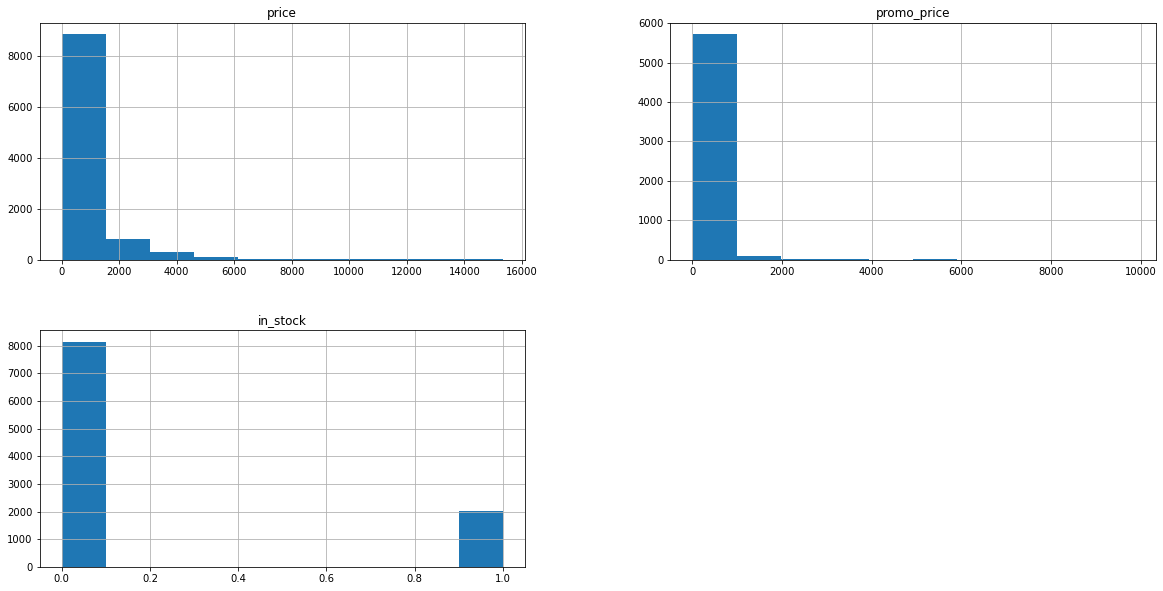

In [13]:
products.hist(figsize=(20,10));

***Prices have outliers***
lower than the 25% quartile - (1.5 x interquartile range), or
higher than the 75% quartile + (1.5 x interquartile range)
is an outlier. Let's use this rule to try and exclude any corrupted data.

In [14]:
products.price.describe()

count    10157.000000
mean       663.124629
std       1355.237789
min          2.990000
25%         44.900000
50%        119.000000
75%        649.891000
max      15339.000000
Name: price, dtype: float64

In [15]:
# calculate the quartiles
Q1_Price = products["price"].quantile(0.25)
Q3_Price = products["price"].quantile(0.75)

# calculate the interquartile range
IQR_Price = Q3_Price-Q1_Price

# filter the DataFrame to include only "non-outliers"
products = products.loc\
[(products["price"] >= (Q1_Price - 1.5*IQR_Price)) & \
 (products["price"] <= (Q3_Price + 1.5*IQR_Price)), :]


In [16]:
#Create list of Order ID that have no outliers
normal_sku_list = list(products["sku"])

In [17]:
#Keep only orders with skus normal
order_ID_list = orderlines.loc[orderlines["sku"].isin(normal_sku_list), 'id_order']

In [18]:
#Keep orders with the list of Order ID
orders = orders.loc[orders["order_id"].isin(order_ID_list), :]
orderlines = orderlines.loc[orderlines["id_order"].isin(order_ID_list), :]

In [19]:
products.price.describe()

count    8846.000000
mean      255.969225
std       345.942272
min         2.990000
25%        39.950000
50%        86.990000
75%       339.000000
max      1555.000000
Name: price, dtype: float64

In [20]:
len(list(orders["order_id"].unique())), len(list(orderlines["id_order"].unique()))

(158648, 158782)

In [21]:
orderlines.id_order.nunique(),orders.order_id.nunique()

(158782, 158648)

## *Orders*

In [22]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158648 entries, 0 to 226903
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      158648 non-null  int64  
 1   created_date  158648 non-null  object 
 2   total_paid    158648 non-null  float64
 3   state         158648 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 6.1+ MB


In [23]:
orders.nunique()

order_id        158648
created_date    157845
total_paid       19845
state                5
dtype: int64

In [24]:
orders.state.value_counts()

Shopping Basket    79196
Completed          39893
Place Order        22139
Pending            12284
Cancelled           5136
Name: state, dtype: int64

***We see that status of orders are not all necessary for our analyses. Here we are interested only in Completed orders***

In [25]:
#Keep only the status of orders that are processing or processed
orders = orders.loc[orders.state == 'Completed']

In [26]:
orders.state.value_counts()

Completed    39893
Name: state, dtype: int64

***Make sure that Orders in Orderlines and Orders table match***

In [27]:
#Keep only orders in both Table Orders and Orderlines
orderlines = orderlines.loc[orderlines['id_order'].isin(orders['order_id'])]
orders = orders.loc[orders['order_id'].isin(orderlines['id_order'])]

In [28]:
orderlines.id_order.nunique(),orders.order_id.nunique()

(39893, 39893)

# Reshape Dataframes
(Add, delete, rename columns, merge tables...)

## *Orderlines*

***It would be interesting to know what Brands made each order. The 3 first letters of SKUs are the brands***

In [29]:
#Create a new column with the short name of brands
orderlines['brand'] = orderlines.sku.str.findall('[A-Za-z]').str.join("")

In [30]:
#Add the Name Brands to the table
orderlines = orderlines.merge(brands,left_on='brand', right_on='short')

In [31]:
#Remove duplicated Columns
orderlines.pop('short')

0        OWC
1        OWC
2        OWC
3        OWC
4        OWC
        ... 
51464    QAR
51465    QAR
51466    QAR
51467    QAR
51468    QAR
Name: short, Length: 51469, dtype: object

***Product ID looks like it was replaced by SKUs. Delete this column***

In [32]:
orderlines.pop('product_id')

0        0
1        0
2        0
3        0
4        0
        ..
51464    0
51465    0
51466    0
51467    0
51468    0
Name: product_id, Length: 51469, dtype: int64

***Create Columns that can help in the future to analyse datas:***
* Total Price (quantity*unit_price)
* Date columns like year, month, day and weekday

In [33]:
orderlines["date"] = pd.to_datetime(orderlines["date"])
orderlines['Month'] = orderlines.date.dt.month
orderlines['Year'] = orderlines.date.dt.year
orderlines['Day'] = orderlines.date.dt.day
orderlines['Week_Day'] = orderlines.date.dt.day_name()
orderlines['price_total'] = orderlines.unit_price * orderlines.product_quantity

***Rename and Reshape DF***

In [34]:
orderlines = orderlines.rename(
    columns={'id':'ID', 'id_order':'Order_ID', 'product_quantity':'Quantity', 
             'sku':'SKU', 'unit_price':'Unit_Price', 'date':'Date',
             'brand':'Brand', 'long':'Brand_Name', 'price_total':'Total_Price'})


In [35]:
orderlines = (
    orderlines[['ID','Order_ID','Date','Year','Month','Day','Week_Day',
                'SKU','Quantity','Unit_Price','Total_Price','Brand','Brand_Name',
                ]]
)

In [36]:
orderlines.head()

,ID,Order_ID,Date,Year,Month,Day,Week_Day,SKU,Quantity,Unit_Price,Total_Price,Brand,Brand_Name
0,1119116,299545,2017-01-01 01:46:16,2017,1,1,Sunday,OWC0100,1,47.49,47.49,OWC,OWC
1,1119814,299891,2017-01-01 19:25:47,2017,1,1,Sunday,OWC0186,1,56.99,56.99,OWC,OWC
2,1119923,299944,2017-01-01 20:31:21,2017,1,1,Sunday,OWC0024,1,24.69,24.69,OWC,OWC
3,1119933,299944,2017-01-01 20:36:45,2017,1,1,Sunday,OWC0092,1,44.64,44.64,OWC,OWC
4,1120182,299404,2017-01-01 22:50:39,2017,1,1,Sunday,OWC0100,1,47.49,47.49,OWC,OWC


## *Products*

***It would be interesting to know what Brands made each sku. The 3 first letters of SKUs are the brands***

In [37]:
#Add Brands with the letters in SKU column
products['brand'] = products.sku.str.findall('[A-Za-z]').str.join("")

In [38]:
#Add the Name Brands to the table
products = products.merge(brands,left_on='brand', right_on='short')

In [39]:
#Remove duplicated Columns 
products.pop('short')

0       RAI
1       RAI
2       RAI
3       RAI
4       RAI
       ... 
7169    RYV
7170    RYV
7171    MTF
7172    SDE
7173    QAR
Name: short, Length: 7174, dtype: object

***Rename and reshape DF***

In [40]:
#Rename Columns
products = products.rename(
    columns={'sku':'SKU', 'name':'Product_Name', 'desc':'Product_Description', 
             'price':'Product_Price', 'promo_price':'Promo_Price', 
             'in_stock':'Stock_Quantity', 'type':'Product_Type','brand':'Brand', 'long':'Brand_Name'})

In [41]:
products.head()

,SKU,Product_Name,Product_Description,Product_Price,Promo_Price,Stock_Quantity,Product_Type,Brand,Brand_Name
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696,RAI,Rain Design
1,RAI0014,Rain Design iSlider iPad Support,Anodized aluminum support multiposition iPad a...,49.99,349.932,0,1216,RAI,Rain Design
2,RAI0015,Rain Design MTower support MacBook Air / Pro,Aluminum support for MacBook Pro and MacBook Air,59.99,499.899,1,8696,RAI,Rain Design
3,RAI0016,Rain Design iLevel2 MacBook Support,Adjustable aluminum bracket height compatible ...,84.99,669.904,1,8696,RAI,Rain Design
4,RAI0018,"Rain Design Mbase Support for iMac 27 """,Minimalist support lifting drawer iMac 27,84.99,749.898,1,8696,RAI,Rain Design


## *Orders*

***Create Columns that can help in the future to analyse datas:***
* Date columns like year, month, day and weekday
* Price from Orderlines (for comparaison)

In [42]:
orders['created_date'] = pd.to_datetime(orders['created_date'])
orders['Month'] = orders.created_date.dt.month
orders['Year'] = orders.created_date.dt.year
orders['Day'] = orders.created_date.dt.day
orders['Week_Day'] = orders.created_date.dt.day_name()

In [43]:
#Add a columns for the price of Orderlines 
Orderlines_IDs = orderlines.groupby('Order_ID')['Total_Price'].sum().reset_index()
orders = orders.merge(Orderlines_IDs, left_on='order_id', right_on='Order_ID')

In [44]:
#Create a new Columns for the difference
orders['Difference'] = (orders.total_paid - orders.Total_Price).round(2)

In [45]:
orders.pop('Order_ID')

0        241423
1        242832
2        243330
3        245275
4        246018
          ...  
38519    527034
38520    527035
38521    527036
38522    527042
38523    527112
Name: Order_ID, Length: 38524, dtype: int64

***Let's see this Difference Columns***

In [46]:
orders.Difference.describe()

count    38524.000000
mean         6.815215
std         44.266721
min       -165.000000
25%          0.000000
50%          4.990000
75%          6.990000
max       3984.990000
Name: Difference, dtype: float64

***Let's remove the outliers***

In [47]:
# calculate the quartiles
Q1 = orders["Difference"].quantile(0.25)
Q3 = orders["Difference"].quantile(0.75)

# calculate the interquartile range
IQR = Q3-Q1

# filter the DataFrame to include only "non-outliers"
orders = orders.loc[(orders["Difference"] >= (Q1 - 1.5*IQR)) & (orders["Difference"] <= (Q3 + 1.5*IQR)), :]



In [49]:
orderlines.Order_ID.nunique(),orders.order_id.nunique()

(38524, 37489)

In [50]:
#Keep only orders in both Table Orders and Orderlines
orderlines = orderlines.loc[orderlines['Order_ID'].isin(orders['order_id'])]
orders = orders.loc[orders['order_id'].isin(orderlines['Order_ID'])]

In [51]:
orderlines.Order_ID.nunique(),orders.order_id.nunique()

(37489, 37489)

In [54]:
orders.Difference.describe()

count    37489.000000
mean         3.954248
std          2.838119
min         -5.000000
25%          0.000000
50%          4.990000
75%          6.990000
max         16.710000
Name: Difference, dtype: float64

***Rename and reshape DF***

In [52]:
#Rename Columns
orders = orders.rename(
    columns={'order_id':'Order_ID', 'created_date':'Date', 'total_paid':'Total_Invoice', 
             'state':'Invoice_Status'}
)

In [53]:
#Reshape
orders = (
    orders[['Order_ID','Date','Year','Month','Day','Week_Day',
                'Invoice_Status', 'Total_Invoice', 'Total_Price', 'Difference'
                ]]
)

In [ ]:
orders.head()

## *Brands*

# Last check and Export DataFrames

In [55]:
orderlines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49837 entries, 0 to 51468
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ID           49837 non-null  int64         
 1   Order_ID     49837 non-null  int64         
 2   Date         49837 non-null  datetime64[ns]
 3   Year         49837 non-null  int64         
 4   Month        49837 non-null  int64         
 5   Day          49837 non-null  int64         
 6   Week_Day     49837 non-null  object        
 7   SKU          49837 non-null  object        
 8   Quantity     49837 non-null  int64         
 9   Unit_Price   49837 non-null  float64       
 10  Total_Price  49837 non-null  float64       
 11  Brand        49837 non-null  object        
 12  Brand_Name   49837 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(6), object(4)
memory usage: 5.3+ MB


In [56]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37489 entries, 0 to 38523
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order_ID        37489 non-null  int64         
 1   Date            37489 non-null  datetime64[ns]
 2   Year            37489 non-null  int64         
 3   Month           37489 non-null  int64         
 4   Day             37489 non-null  int64         
 5   Week_Day        37489 non-null  object        
 6   Invoice_Status  37489 non-null  object        
 7   Total_Invoice   37489 non-null  float64       
 8   Total_Price     37489 non-null  float64       
 9   Difference      37489 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(2)
memory usage: 3.1+ MB


In [57]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7174 entries, 0 to 7173
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SKU                  7174 non-null   object 
 1   Product_Name         7174 non-null   object 
 2   Product_Description  7171 non-null   object 
 3   Product_Price        7174 non-null   float64
 4   Promo_Price          4721 non-null   float64
 5   Stock_Quantity       7174 non-null   int64  
 6   Product_Type         7131 non-null   object 
 7   Brand                7174 non-null   object 
 8   Brand_Name           7174 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 560.5+ KB


In [58]:
orderlines.to_csv("/Users/alex/Desktop/Eniac/Project_Folder/DataFrames/Quality_Checked/qu_orderlines.csv", index=False)
orders.to_csv("/Users/alex/Desktop/Eniac/Project_Folder/DataFrames/Quality_Checked/qu_orders.csv", index=False)
products.to_csv("/Users/alex/Desktop/Eniac/Project_Folder/DataFrames/Quality_Checked/qu_products.csv", index=False)
brands.to_csv("/Users/alex/Desktop/Eniac/Project_Folder/DataFrames/Quality_Checked/qu_brands.csv", index=False)